DTSA 5509 Intro to Machine Learning: Supervised Learning, Final Project December 2025

**PROBLEM DESCRIPTION:**

Diabetes is a serious health concern in the United States.  According to the Centers for Disease Control (CDC) website, 38.4 million people of all ages — or 11.6% of the U.S. population— had diabetes in 2021.
https://www.cdc.gov/diabetes/php/data-research/index.html   

If it were possible to predict a diagnosis of diabetes or pre-diabetes, millions of dollars in healthcare costs could be saved. This Machine Learning project attempts to build a model from a data set which could reliably predict a diagnosis of diabetes (or pre-diabetes). *

This project attempts to answer the Classification problem of whether there are clear indicators to Diabetes.  

**DATA SOURCES AND INFORMATION:** 

Teboul, A. (2021). "Diabetes Health Indicators Dataset". UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators  

Source of Original Data File created by CDC as part of their Behavioral Risk Factor Surveillance System (BRFSS) 2015 survey: "CDC Diabetes Health Indicators": https://www.cdc.gov/brfss/annual_data/annual_data.htm

This data set "...contains healthcare statistics and lifestyle survey information, including lab results and answers to survey questions. The target variable classification is whether a patient has diabetes, is pre-diabetic (1), or healthy (0)."  (https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

The dataset contains three files: one containing features, one containing targets, and the third a description of the variables (qty = 23). The primary data file of features contains 253,680 rows of data.  

**EDA PROCEDURE:**

*Pre-Modeling Steps:*
- *1) Load and Examine Data: What is the shape of the dataframe? How many features, columns, rows? Types of data?*

The Diabetes data set was not the first one to be studied. Other data sets included those on wine quality, state-wide student assessment scores, and data collected on life support systems.  When examining these data sets, it was found that some containted too many null values which were impossible to impune but if removed would lead to an inaccurate model (as in the case of the student assessement data where personally identifiable data had been intentually suppressed). Another data set contained fewer null values, but contained a mix of categorical and numerical values which were not clearly defined.  

- *2) Clean data:  Decide how to handle Null values (remove or Impune), convert certain variables to categorical* 

Note: Some code to handle null values is still contained in the notebook for reference, but has been commented out.  
The Diabetes data was found to contain no null values, but it did present its own challenge. Some of the features, such as GenHlth, appear to be numerical, but were in fact categorical.  For example, the GenHlth feature contains numbers 1-5, but these represent a categories such as "Good", "Fair", "Poor". Meanwhile, features such as BMI are numerical.  This "category issue" was handled by using OneHotEncoder.

- *3) Correlation Table & Heat maps:  Use a correlation table and heat map to quickly look at potentially important features*

A correlation table and heat map were generated to look for highly correlated features in the data. Features such as'Age', 'BMI', 'DiffWalk', 'GenHlth', 'HighBP', 'HighChol' are some examples with (relatively) strong scores which were examined more closely as to their importance to the machine learning model. 

*Analysis (model building & training):*

- *1) Try a few techniques, such as Decision Tree Classifier, Random Forest Classifier, logistic regression*

A pipeline was created to try several classifiers, and depending on those results, further invesitgation was performed.  

- *2) Calculate accuracy, AUROC using train and test data*

Further adjustments and investigations were made into the Random Forest Classifier (adjustments to the hyperparameters) and the logistic regression classifier. The notebook contains the results of these calculations.

- *3) Examine impacts of selecting those features of highest importance*
The notebook contains visualizations showing the impacts of selecting those features of highest importance.


**RESULTS:**

Overall, it was found that Logistic Regression performed well without overfitting. The most important features, such as the General Heatlh score (GenHlth), BMI, and Age were good indicators of the possibility of Diabetes. It should be noted that these important features DO NOT imply causality. Rather, they are likely to be present as an indicator of one's health overall. 

See also: Discussion/Conclusion at the end of this Notebook.

GitHub Repository: 


**<u>*NOTE:</u>**
*This project is NOT intended to be used in any way as a medical diagnostic tool. All healthcare concerns, including diabetes, should be discussed with and diagnosed by a medical professional.*

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone 

#from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, RocCurveDisplay


In [32]:
# CDC Diabetes Health Indicators

X = pd.read_csv("/Users/wendyrasmussen/Documents/CU Boulder/DTSA 5509 Intro to Machine Learning/"
                "Final Project_Intro to Machine Learning/891.CDC_Diabetes_Health_Indicators.features.csv")

targets = pd.read_csv("/Users/wendyrasmussen/Documents/CU Boulder/DTSA 5509 Intro to Machine Learning/"
                      "Final Project_Intro to Machine Learning/891.CDC_Diabetes_Health_Indicators.targets.csv")

variables = pd.read_csv("/Users/wendyrasmussen/Documents/CU Boulder/DTSA 5509 Intro to Machine Learning/"
                        "Final Project_Intro to Machine Learning/891.CDC_Diabetes_Health_Indicators.variables.csv")


print("Total number of columns features: ", X.shape[1])
print("Row count features:", X.shape[0])

print("Total number of columns targets: ", targets.shape[1])
print("Row count targets:", targets.shape[0])

for i, col in enumerate(targets.columns):
      print(f"{i}: {col}")

print("Total number of columns variables: ", variables.shape[1])
print("Row count variables:", variables.shape[0])


repo_id=891
def make_target(y):
    return y[y.columns[-1]]  # Diabetes binary

# Make a list of feature names (remove any target features)
features = sorted(set(variables[variables["role"] == "Feature"]["name"]))
# Make a list of categorical features.
# (some categorical features with units are mislabelled)
categorical = sorted(variables[(variables["role"] == "Feature") &
                               (# If there are units its not Categorical!
                                   ((variables["units"].isnull()) & (variables["type"] == "Categorical"))
                                   # Treat binary as numeric
#                                |  (variables["type"] == "Binary")
                               )]["name"])

variables = variables.set_index('name')

X = X[features]
y = make_target(targets)
assert len(np.unique(y)==2)
variables

Total number of columns features:  22
Row count features: 253680
Total number of columns targets:  2
Row count targets: 253680
0: Unnamed: 0
1: Diabetes_binary
Total number of columns variables:  8
Row count variables: 23


,Unnamed: 0,role,type,demographic,description,units,missing_values
name,,,,,,,
ID,0,ID,Integer,NaN,Patient ID,NaN,no
Diabetes_binary,1,Target,Binary,NaN,0 = no diabetes 1 = prediabetes or diabetes,NaN,no
HighBP,2,Feature,Binary,NaN,0 = no high BP 1 = high BP,NaN,no
HighChol,3,Feature,Binary,NaN,0 = no high cholesterol 1 = high cholesterol,NaN,no
CholCheck,4,Feature,Binary,NaN,0 = no cholesterol check in 5 years 1 = yes ch...,NaN,no
BMI,5,Feature,Integer,NaN,Body Mass Index,NaN,no
Smoker,6,Feature,Binary,NaN,Have you smoked at least 100 cigarettes in you...,NaN,no
Stroke,7,Feature,Binary,NaN,(Ever told) you had a stroke. 0 = no 1 = yes,NaN,no
HeartDiseaseorAttack,8,Feature,Binary,NaN,coronary heart disease (CHD) or myocardial inf...,NaN,no


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Age                   253680 non-null  int64
 1   AnyHealthcare         253680 non-null  int64
 2   BMI                   253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   DiffWalk              253680 non-null  int64
 5   Education             253680 non-null  int64
 6   Fruits                253680 non-null  int64
 7   GenHlth               253680 non-null  int64
 8   HeartDiseaseorAttack  253680 non-null  int64
 9   HighBP                253680 non-null  int64
 10  HighChol              253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  Income                253680 non-null  int64
 13  MentHlth              253680 non-null  int64
 14  NoDocbcCost           253680 non-null  int64
 15  PhysActivity          253680 non-n

In [34]:
# Look at whether we have many of each class
print(y.info())
print(y.value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: Diabetes_binary
Non-Null Count   Dtype
--------------   -----
253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB
None
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64


In [35]:
remove = []
# If just 3,4 values, treat as categorical
# 2 choices can be treated as numeric
for col in features:
    if col in categorical: continue
    if "codebook" in variables.loc[col]['description']:
        print(f"{col} seems like a coded variable")
        categorical.append(col)
        
    values = X[col].value_counts()
    if len(values) in [3,4]: 
        # Its really categorical
        print(f"{col} seems categorical")
        categorical.append(col)
    
for col in categorical:
    values = X[col].value_counts()
    if len(values) in [3,4]: continue
    # 2 choices can be treated as numeric
    print(f'Categories in {col}: {len(values)}')

    if X[col].dtype != int and X[col].dtype!=float: continue
    # This looks like numeric data, not categories
    print(f"{col} looks numeric...")
    print(values)
    remove.append(col)

if remove:
    categorical = [c for c in categorical if c not in remove]
    print("Not categorical:", remove)
        

for col in features:
    # Is the numeric (non-categorical data) really category numbers?
    if col in categorical:
        continue
    values = X[col].value_counts()
    if len(values)>20: continue
    if len(values)==2: continue
    print(f'NOTE: Few unique values in numeric column: {col}', list(values.index))
    
print("Categorical:", categorical)
for col in categorical:
    print(f"Num categories in {col}: {len(X[col].value_counts())}")
print("Numeric", sorted(set(features)-set(categorical)))
print("Each category will become a column if one-hot encoder is used - should not have very many")

Age seems like a coded variable
Education seems like a coded variable
Income seems like a coded variable
Categories in Age: 13
Age looks numeric...
Age
9     33244
10    32194
8     30832
7     26314
11    23533
6     19819
13    17363
5     16157
12    15980
4     13823
3     11123
2      7598
1      5700
Name: count, dtype: int64
Categories in Education: 6
Education looks numeric...
Education
6    107325
5     69910
4     62750
3      9478
2      4043
1       174
Name: count, dtype: int64
Categories in Income: 8
Income looks numeric...
Income
8    90385
7    43219
6    36470
5    25883
4    20135
3    15994
2    11783
1     9811
Name: count, dtype: int64
Not categorical: ['Age', 'Education', 'Income']
NOTE: Few unique values in numeric column: Age [9, 10, 8, 7, 11, 6, 13, 5, 12, 4, 3, 2, 1]
NOTE: Few unique values in numeric column: Education [6, 5, 4, 3, 2, 1]
NOTE: Few unique values in numeric column: GenHlth [2, 3, 1, 4, 5]
NOTE: Few unique values in numeric column: Income [8, 7, 

In [36]:
# Report nullness
for percent, col in sorted( ((100 * X[col].isnull().sum() / len(X)), col) for col in X.columns):
    print(f"{percent:6.2f}% percent_null: {col}" )
# ------------------------------------------------------------------------
print(categorical)
for col in X.columns:
    if col in categorical:
        print(col, " num unique", len(X[col].value_counts()))

  0.00% percent_null: Age
  0.00% percent_null: AnyHealthcare
  0.00% percent_null: BMI
  0.00% percent_null: CholCheck
  0.00% percent_null: DiffWalk
  0.00% percent_null: Education
  0.00% percent_null: Fruits
  0.00% percent_null: GenHlth
  0.00% percent_null: HeartDiseaseorAttack
  0.00% percent_null: HighBP
  0.00% percent_null: HighChol
  0.00% percent_null: HvyAlcoholConsump
  0.00% percent_null: Income
  0.00% percent_null: MentHlth
  0.00% percent_null: NoDocbcCost
  0.00% percent_null: PhysActivity
  0.00% percent_null: PhysHlth
  0.00% percent_null: Sex
  0.00% percent_null: Smoker
  0.00% percent_null: Stroke
  0.00% percent_null: Veggies
[]


In [37]:
X.corr()

,Age,AnyHealthcare,BMI,CholCheck,DiffWalk,Education,Fruits,GenHlth,HeartDiseaseorAttack,HighBP,...,HvyAlcoholConsump,Income,MentHlth,NoDocbcCost,PhysActivity,PhysHlth,Sex,Smoker,Stroke,Veggies
Age,1.000000,0.138046,-0.036618,0.090321,0.204450,-0.101901,0.064547,0.152450,0.221618,0.344452,...,-0.034578,-0.127775,-0.092068,-0.119777,-0.092511,0.099130,-0.027340,0.120641,0.126974,-0.009771
AnyHealthcare,0.138046,1.000000,-0.018471,0.117626,0.007074,0.122514,0.031544,-0.040817,0.018734,0.038425,...,-0.010488,0.157999,-0.052707,-0.232532,0.035505,-0.008276,-0.019405,-0.023251,0.008776,0.029584
BMI,-0.036618,-0.018471,1.000000,0.034495,0.197078,-0.103932,-0.087518,0.239185,0.052904,0.213748,...,-0.048736,-0.100069,0.085310,0.058206,-0.147294,0.121141,0.042950,0.013804,0.020153,-0.062275
CholCheck,0.090321,0.117626,0.034495,1.000000,0.040585,0.001510,0.023849,0.046589,0.044206,0.098508,...,-0.023730,0.014259,-0.008366,-0.058255,0.004190,0.031775,-0.022115,-0.009929,0.024158,0.006121
DiffWalk,0.204450,0.007074,0.197078,0.040585,1.000000,-0.192642,-0.048352,0.456920,0.212709,0.223618,...,-0.037668,-0.320124,0.233688,0.118447,-0.253174,0.478417,-0.070299,0.122463,0.176567,-0.080506
Education,-0.101901,0.122514,-0.103932,0.001510,-0.192642,1.000000,0.110187,-0.284912,-0.099600,-0.141358,...,0.023997,0.449106,-0.101830,-0.100701,0.199658,-0.155093,0.019480,-0.161955,-0.076009,0.154329
Fruits,0.064547,0.031544,-0.087518,0.023849,-0.048352,0.110187,1.000000,-0.103854,-0.019790,-0.040555,...,-0.035288,0.079929,-0.068217,-0.044243,0.142756,-0.044633,-0.091175,-0.077666,-0.013389,0.254342
GenHlth,0.152450,-0.040817,0.239185,0.046589,0.456920,-0.284912,-0.103854,1.000000,0.258383,0.300530,...,-0.036724,-0.370014,0.301674,0.166397,-0.266186,0.524364,-0.006091,0.163143,0.177942,-0.123066
HeartDiseaseorAttack,0.221618,0.018734,0.052904,0.044206,0.212709,-0.099600,-0.019790,0.258383,1.000000,0.209361,...,-0.028991,-0.141011,0.064621,0.031000,-0.087299,0.181698,0.086096,0.114441,0.203002,-0.039167
HighBP,0.344452,0.038425,0.213748,0.098508,0.223618,-0.141358,-0.040555,0.300530,0.209361,1.000000,...,-0.003972,-0.171235,0.056456,0.017358,-0.125267,0.161212,0.052207,0.096991,0.129575,-0.061266


<Axes: >

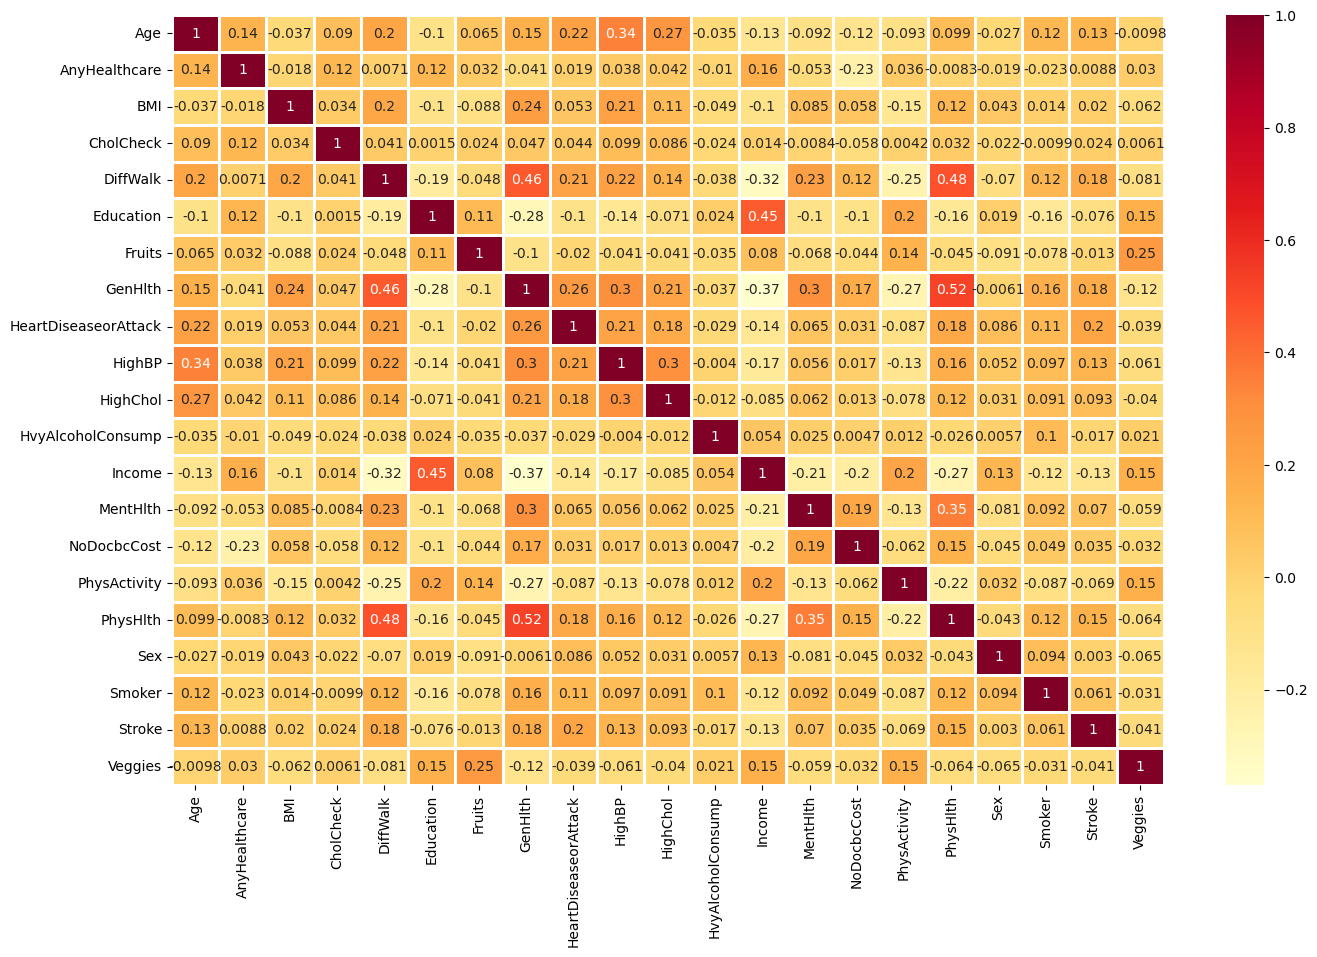

In [38]:
plt.figure(figsize =(16,10))

sns.heatmap(X.corr(), vmin=None, vmax=None, cmap='YlOrRd', center=None, robust=False, annot=True, 
                   fmt='.2g', annot_kws=None, linewidths=1, linecolor='white', cbar=True, cbar_kws=None, 
                   cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, 
                   )

In [39]:
# Combine the datframe containing features with the target dataframe in order to have a diabetes score as 
# part of the correlation table and heatmap.  

feature_target = X.copy()
diabetes_binary = targets.copy()

feature_target["Diabetes_binary"] = diabetes_binary["Diabetes_binary"].values

print("Total number of columns features: ", feature_target.shape[1])
print("Row count features:", feature_target.shape[0])

print("Total number of columns targets: ", diabetes_binary.shape[1])
print("Row count targets:", diabetes_binary.shape[0])

for i, col in enumerate(feature_target.columns):
      print(f"{i}: {col}")

Total number of columns features:  22
Row count features: 253680
Total number of columns targets:  2
Row count targets: 253680
0: Age
1: AnyHealthcare
2: BMI
3: CholCheck
4: DiffWalk
5: Education
6: Fruits
7: GenHlth
8: HeartDiseaseorAttack
9: HighBP
10: HighChol
11: HvyAlcoholConsump
12: Income
13: MentHlth
14: NoDocbcCost
15: PhysActivity
16: PhysHlth
17: Sex
18: Smoker
19: Stroke
20: Veggies
21: Diabetes_binary


In [40]:
feature_target.corr()

,Age,AnyHealthcare,BMI,CholCheck,DiffWalk,Education,Fruits,GenHlth,HeartDiseaseorAttack,HighBP,...,Income,MentHlth,NoDocbcCost,PhysActivity,PhysHlth,Sex,Smoker,Stroke,Veggies,Diabetes_binary
Age,1.000000,0.138046,-0.036618,0.090321,0.204450,-0.101901,0.064547,0.152450,0.221618,0.344452,...,-0.127775,-0.092068,-0.119777,-0.092511,0.099130,-0.027340,0.120641,0.126974,-0.009771,0.177442
AnyHealthcare,0.138046,1.000000,-0.018471,0.117626,0.007074,0.122514,0.031544,-0.040817,0.018734,0.038425,...,0.157999,-0.052707,-0.232532,0.035505,-0.008276,-0.019405,-0.023251,0.008776,0.029584,0.016255
BMI,-0.036618,-0.018471,1.000000,0.034495,0.197078,-0.103932,-0.087518,0.239185,0.052904,0.213748,...,-0.100069,0.085310,0.058206,-0.147294,0.121141,0.042950,0.013804,0.020153,-0.062275,0.216843
CholCheck,0.090321,0.117626,0.034495,1.000000,0.040585,0.001510,0.023849,0.046589,0.044206,0.098508,...,0.014259,-0.008366,-0.058255,0.004190,0.031775,-0.022115,-0.009929,0.024158,0.006121,0.064761
DiffWalk,0.204450,0.007074,0.197078,0.040585,1.000000,-0.192642,-0.048352,0.456920,0.212709,0.223618,...,-0.320124,0.233688,0.118447,-0.253174,0.478417,-0.070299,0.122463,0.176567,-0.080506,0.218344
Education,-0.101901,0.122514,-0.103932,0.001510,-0.192642,1.000000,0.110187,-0.284912,-0.099600,-0.141358,...,0.449106,-0.101830,-0.100701,0.199658,-0.155093,0.019480,-0.161955,-0.076009,0.154329,-0.124456
Fruits,0.064547,0.031544,-0.087518,0.023849,-0.048352,0.110187,1.000000,-0.103854,-0.019790,-0.040555,...,0.079929,-0.068217,-0.044243,0.142756,-0.044633,-0.091175,-0.077666,-0.013389,0.254342,-0.040779
GenHlth,0.152450,-0.040817,0.239185,0.046589,0.456920,-0.284912,-0.103854,1.000000,0.258383,0.300530,...,-0.370014,0.301674,0.166397,-0.266186,0.524364,-0.006091,0.163143,0.177942,-0.123066,0.293569
HeartDiseaseorAttack,0.221618,0.018734,0.052904,0.044206,0.212709,-0.099600,-0.019790,0.258383,1.000000,0.209361,...,-0.141011,0.064621,0.031000,-0.087299,0.181698,0.086096,0.114441,0.203002,-0.039167,0.177282
HighBP,0.344452,0.038425,0.213748,0.098508,0.223618,-0.141358,-0.040555,0.300530,0.209361,1.000000,...,-0.171235,0.056456,0.017358,-0.125267,0.161212,0.052207,0.096991,0.129575,-0.061266,0.263129


<Axes: >

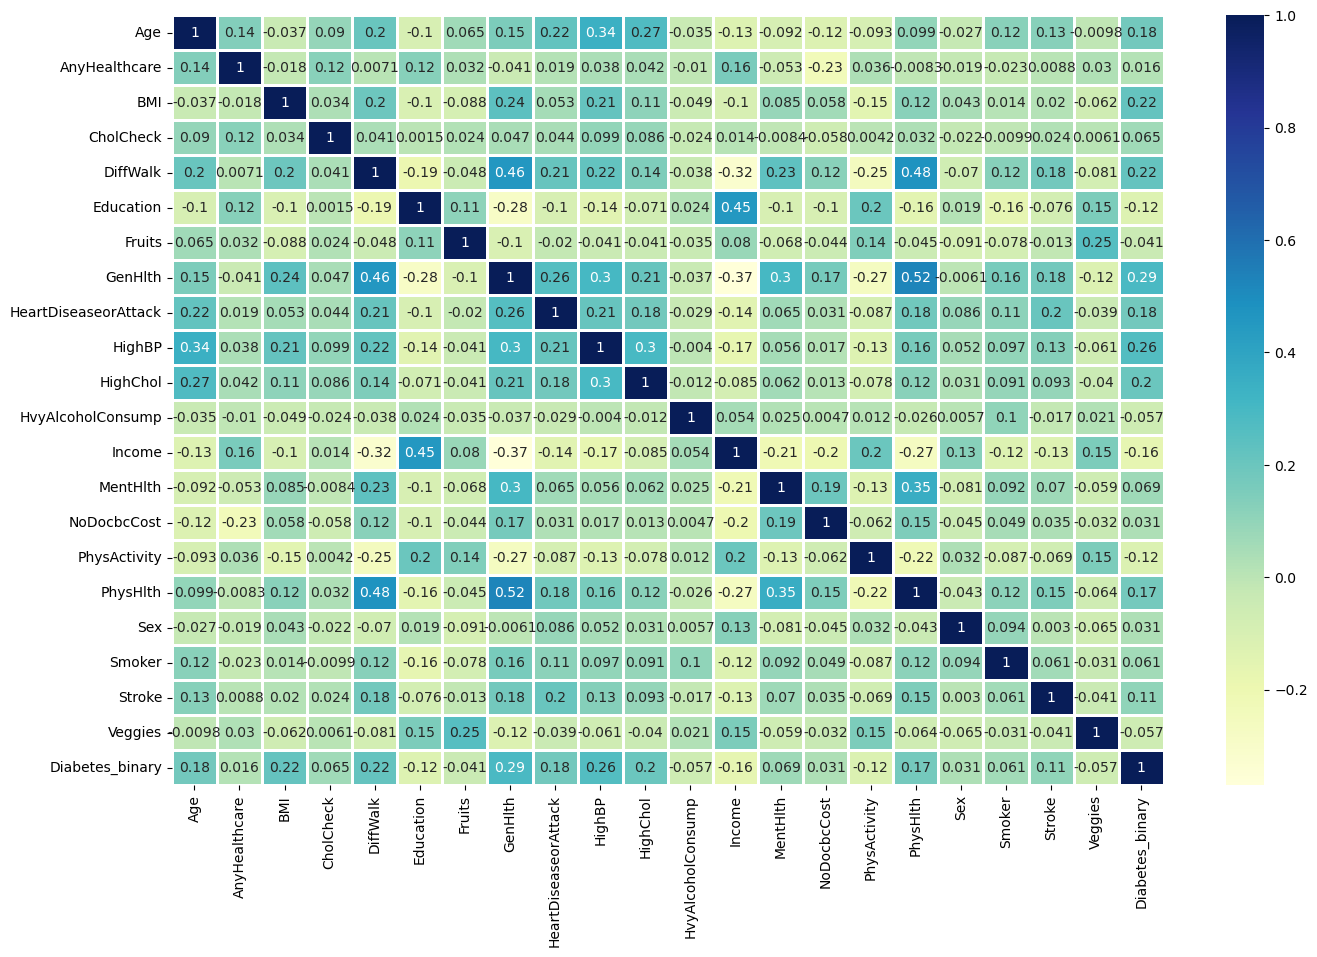

In [41]:
plt.figure(figsize =(16,10))

sns.heatmap(feature_target.corr(), vmin=None, vmax=None, cmap='YlGnBu', center=None, robust=False, annot=True, 
                   fmt='.2g', annot_kws=None, linewidths=1, linecolor='white', cbar=True, cbar_kws=None, 
                   cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, 
                   )

In [42]:
# Handle Nulls (NOTE: was going to be used for another data file, but diabetes did not contain null values)
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# def drop_null_rows_for_each(datas):
#     assert isinstance(datas, list) or isinstance(datas, tuple)
#     nulls = None

#     for d in datas:
#         if len(d.shape) == 1:
#             _mask = d.isnull().any()
#         else:
#             _mask = d.isnull().any(axis=1)
#         if _mask.any():
#             if nulls is None:
#                 nulls = _mask
#             else:
#                 nulls |= _mask  # logical or

#     if nulls is None:
#         return datas
#     if not nulls.any():
#         return datas
#     return [d[~nulls] for d in datas]

def test_classifier(clsfr,
                    one_hot_encode_cols=(),
                    label_encode_cols=(),
                    mean_normalize=False,
                    drop_null_rows=False, # Drop entire row if there's a null cell
                    mean_impute_missing=False,
                    train_size = None, 
                    test_size = None
                    ):
    print("---------")
    _clsfr = clsfr
    # clsfr = _clsfr
    classifier_name = clsfr.__class__.__name__
    print(f"Classifier: {classifier_name}")

    pipeline_steps = []
    # features = list(X.columns)

    col_transformers = []

    if label_encode_cols:
        print(f"label_encoded_cols  {list(label_encode_cols)}")
        col_transformers.append(
            ('OrdinalEncoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), label_encode_cols),
        )

    if one_hot_encode_cols:
        print(f"Yes/No encoding  {list(one_hot_encode_cols)}")
        col_transformers.append(
            ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore'), one_hot_encode_cols),
        )

    if col_transformers:
        preprocessor = ColumnTransformer(
            transformers=col_transformers,
            remainder='passthrough',
        )
        pipeline_steps.append(("preprocess", preprocessor))

    if mean_impute_missing:
        print("mean_impute_missing [YES]")
        pipeline_steps.append(('mean_imputer', SimpleImputer(strategy='mean')))

    if mean_normalize:
        print("mean_normalize [YES]")
        pipeline_steps.append(('scaler', StandardScaler(with_mean=False)))

  #  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   
    if train_size and train_size < len(X):
        # Some classifiers can't handle large train datasets
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size=test_size, random_state = 42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    
    print(f"X_train.shape = {X_train.shape} y_train.shape = {y_train.shape}")
    print(f"y value_counts: {y_train.value_counts()}")

    if drop_null_rows:
        _X_train, _y_train = X_train, y_train  # Keep a copy of the original for debugging.
        X_train, y_train = drop_null_rows_for_each([X_train, y_train])
        X_test, y_test = drop_null_rows_for_each([X_test, y_test])
        print("Dropped null rows", len(_X_train), "->", len(X_train))

    pipeline = None
    if pipeline_steps:
        pipeline = Pipeline(steps=pipeline_steps + [
            (classifier_name, _clsfr)
        ])
        clsfr = pipeline
        # Pipeline(steps=pipeline_steps).fit_transform(X_train).dtype
        # print("Num transformed columns", len(pipeline_steps[-2][1].fit(X_train).get_feature_names_out()))# number of output columns

    print("Fitting...", y_train.shape)
    clsfr.fit(X_train, y_train)
    print("Fitted.")

    if pipeline_steps:
        clsfr_final = clsfr.steps[-1][1]
    else:
        clsfr_final = clsfr

    # PRINT FEATURE IMPORTANCES
    if 0:
        if hasattr(clsfr_final, "feature_importances_"):  # Print 10 most important features
            print("Feature importance (feat_imp)")
            importances = clsfr_final.feature_importances_
            feature_names = X.columns
            feat_imp = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values(by='importance', ascending=False)  # [:10]
            print(feat_imp)

        elif hasattr(clsfr_final, "coef_"):  # Print 10 most important features
            print("Feature importance (coeffs)")
            importances = np.abs(clsfr_final.coef_[0])
            if pipeline is not None:
                feature_names = pipeline.steps[-2][1].get_feature_names_out()
            else:
                feature_names = X.columns

            feat_imp = pd.DataFrame({
                "feature": feature_names,
                "importance": importances
            }).sort_values("importance", ascending=False)  # [:10]
            with pd.option_context('display.max_rows', None, 'display.max_columns', None):
                print(feat_imp)

    print("Predicting...")
    y_pred = clsfr.predict(X_test)
    print("Predicted.")
    # y_prob = clsfr.predict_proba(X_test) #
    proba = clsfr.predict_proba(X_test)
    print("Predicted probabilities", proba.shape)
    assert len(proba.shape) == 2
    assert proba.shape[1] == 2
    y_proba = proba[:, 0]  # [[pclass0, pclass1], .... ] => [pclass0 ]

    print(f"[TEST] Accuracy {accuracy_score(y_test, y_pred)}")
    print(f"[TEST] AUROC {roc_auc_score(y_test, proba[:,1])}")
    print(f"[TRAIN] AUROC {roc_auc_score(y_train, clsfr.predict_proba(X_train)[:,1])}")

    print(f"Classifier: {classifier_name}")
    print("-----")
    return classifier_name, clsfr, X_test, y_test, proba, X_train, y_train, pipeline_steps


In [43]:
results = {}
# Try a variety of classifiers and preprocessing
# LogisticRegression: required no null values (or impute them).
# label_encode_cols: DecisionTreeClassifier, RandomForestClassifier accept categorical values but require strings 
#    to be encoded as ints
# one_hot_encode_cols: categorical columns are replaced by binary columns that indicate whether the category 
#    is present or not.
# mean_normalize: This is needed by SVC and LogisticRegression because large coefficients are downweighted.
# drop_null_rows: Drop entire row if there's a null cell. But also biases the data
# mean_impute_missing: An alternative to dropping a low of rows with null values is replace with the mean.
for clsfr, parameters in [
    (DecisionTreeClassifier(
        # criterion="gini",
        # max_depth=7,  # or 3–10 depending on data size
        min_samples_split=20,
        min_samples_leaf=10,
        max_features="sqrt",  # or "auto" but sqrt is safer
        class_weight=None,  # or "balanced" for imbalanced data
        random_state=42
    ), dict(label_encode_cols=categorical,
#            train_size=50000,
#             test_size=20000,
           )),
       
    (RandomForestClassifier(
        n_estimators=300,  # more stable than 100
        criterion="gini",
        max_depth=None,  # let trees grow; RF handles variance well
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",  # standard and usually best
        bootstrap=True,
        class_weight=None,  # or "balanced" for imbalance
        n_jobs=-1,
        random_state=42
    ), dict(label_encode_cols=categorical, mean_impute_missing=True,
#            train_size=50000,
#             test_size=20000,
           )),

    (RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    ), dict(label_encode_cols=categorical, mean_impute_missing=True)),

#     # Accuracy 0.8112994350282486
#     # AUROI 0.5852501125881941
#     (LogisticRegression(), dict(mean_normalize=False, one_hot_encode_cols=categorical, drop_null_rows=True)),

#     # Accuracy 0.8666666666666667
#     # AUROC 0.6012419066139261
#     (LogisticRegression(), dict(mean_normalize=True, one_hot_encode_cols=categorical, drop_null_rows=True)),  
       # C>0. mean_normalize=True helped a little.

    (LogisticRegression(), dict(mean_normalize=True, one_hot_encode_cols=categorical, mean_impute_missing=True)),
#     # C>0. mean_normalize=True helped a little.
    
  
# SVC fails because too slow with enough data.
#     (SVC(kernel='linear', C=1.0, random_state=42, probability=True),
#      dict(mean_normalize=False, one_hot_encode_cols=categorical, mean_impute_missing=True,
# #          train_size=2000
#          )),
    # # 0.61
    # (SVC(kernel='linear', C=1.0, random_state=42, probability=True),
    #  dict(mean_normalize=True, one_hot_encode_cols=categorical, mean_impute_missing=True)),
    # Accuracy 0.642, AUROI 0.840   << There's a good accuracy at some cut-off
#     (SVC(kernel="rbf", C=1.0, gamma="scale", probability=True),
#      dict(mean_normalize=False, one_hot_encode_cols=categorical, mean_impute_missing=True,
#          train_size=20000,
#          test_size=20000,         
#          )),
    # # Accuracy 0.854, AUROC 0.6144   << Very poor!
    # (SVC(kernel="rbf", C=1.0, gamma="scale", probability=True),
    #  dict(mean_normalize=True, one_hot_encode_cols=categorical, mean_impute_missing=True)),

]:
    classifier_name, clsfr, X_test, y_test, y_probs, X_train, y_train, pipeline_steps = test_classifier(clsfr, 
                                                                                                      **parameters)
    results[classifier_name] = dict(
       classifier_name=classifier_name, clsfr=clsfr, X_test=X_test, y_test=y_test,
        y_probs=y_probs, X_train=X_train, y_train=y_train, pipeline_steps=pipeline_steps
    )

---------
Classifier: DecisionTreeClassifier
X_train.shape = (202944, 21) y_train.shape = (202944,)
y value_counts: Diabetes_binary
0    174595
1     28349
Name: count, dtype: int64
Fitting... (202944,)
Fitted.
Predicting...
Predicted.
Predicted probabilities (50736, 2)
[TEST] Accuracy 0.8581480605487228
[TEST] AUROC 0.7708323359885798
[TRAIN] AUROC 0.8711920699074034
Classifier: DecisionTreeClassifier
-----
---------
Classifier: RandomForestClassifier
mean_impute_missing [YES]
X_train.shape = (202944, 21) y_train.shape = (202944,)
y value_counts: Diabetes_binary
0    174595
1     28349
Name: count, dtype: int64
Fitting... (202944,)
Fitted.
Predicting...
Predicted.
Predicted probabilities (50736, 2)
[TEST] Accuracy 0.8681015452538632
[TEST] AUROC 0.8292524880499732
[TRAIN] AUROC 0.9270620526322783
Classifier: RandomForestClassifier
-----
---------
Classifier: RandomForestClassifier
mean_impute_missing [YES]
X_train.shape = (202944, 21) y_train.shape = (202944,)
y value_counts: Diabetes

AUC: 0.8263591216889491


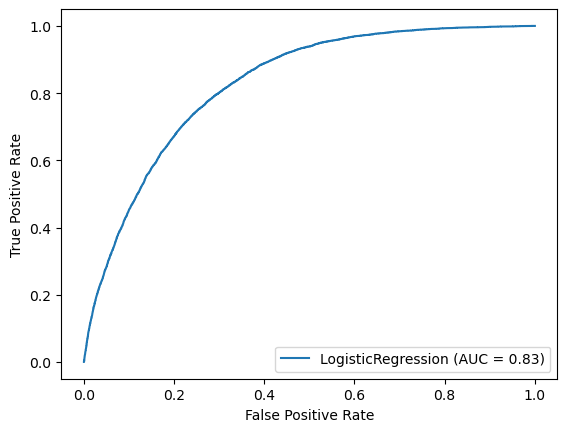

In [44]:
y_score =  y_probs[:, 1]

fpr, tpr, _thresholds = roc_curve(
    y_true=y_test, 
    y_score = y_score
)
auc = roc_auc_score(y_test, y_score)
print('AUC:', auc)

roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name="LogisticRegression").plot()


In [45]:
df = pd.DataFrame(data={
    "tpr":tpr,
    "fpr":fpr,
    "thresholds": _thresholds
})
df

,tpr,fpr,thresholds
0,0.000000,0.000000,inf
1,0.000000,0.000023,0.986121
2,0.000000,0.000046,0.969800
3,0.000429,0.000046,0.957149
4,0.000429,0.000069,0.953592
...,...,...,...
12264,1.000000,0.996845,0.003067
12265,1.000000,0.996891,0.003047
12266,1.000000,0.997325,0.002863
12267,1.000000,0.997371,0.002859


dict_keys(['classifier_name', 'clsfr', 'X_test', 'y_test', 'y_probs', 'X_train', 'y_train', 'pipeline_steps'])


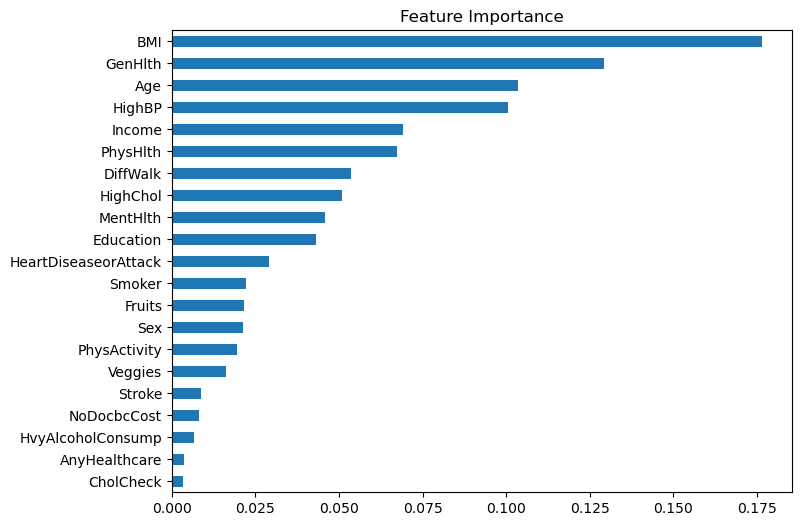

In [46]:
rfresult = results["RandomForestClassifier"]

print(rfresult.keys())
rf = rfresult["clsfr"]
X_train = rfresult["X_train"]
y_train = rfresult["y_train"]
X_test = rfresult["X_test"]
y_test = rfresult["y_test"]

rf = RandomForestClassifier(
        n_estimators=300,  # more stable than 100
        criterion="gini",
        max_depth=None,  # let trees grow; RF handles variance well
        min_samples_split=10,
        min_samples_leaf=5,
        max_features="sqrt",  # standard and usually best
        bootstrap=True,
        class_weight=None,  # or "balanced" for imbalance
        n_jobs=-1,
        random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
    
feat_imp = pd.Series(importances, 
                     index=X_train.columns
                    ).sort_values()

feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

[TRAIN] AUROC 0.8047534482908982
[TEST] AUROC 0.8103654460802824


/Users/wendyrasmussen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


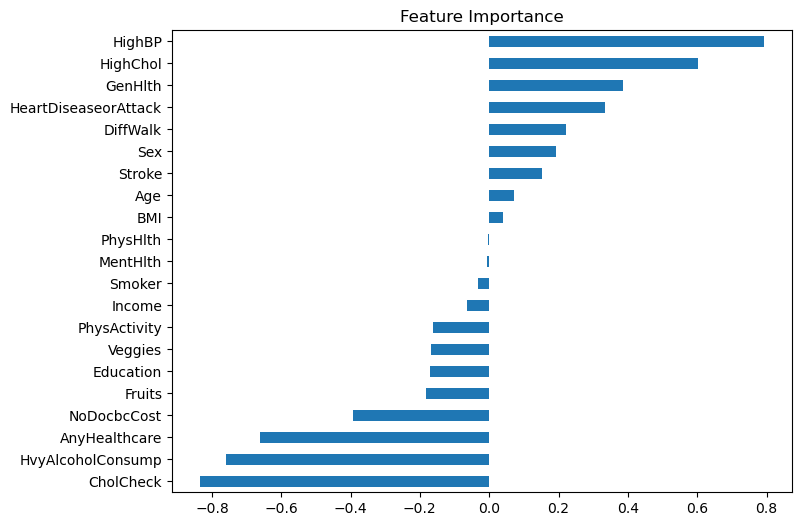

In [47]:
X_train = rfresult["X_train"]
y_train = rfresult["y_train"]
X_test = rfresult["X_test"]
y_test = rfresult["y_test"]

rf = LogisticRegression()
rf.fit(X_train, y_train)

print(f"[TRAIN] AUROC {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
# 0.81
print(f"[TEST] AUROC {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")


importances = rf.coef_[0,:]

feat_imp = pd.Series(importances, 
                     index=X_train.columns
                    ).sort_values()

feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

[TRAIN] AUROC 0.8211901022206236
[TEST] AUROC 0.8263578996335935


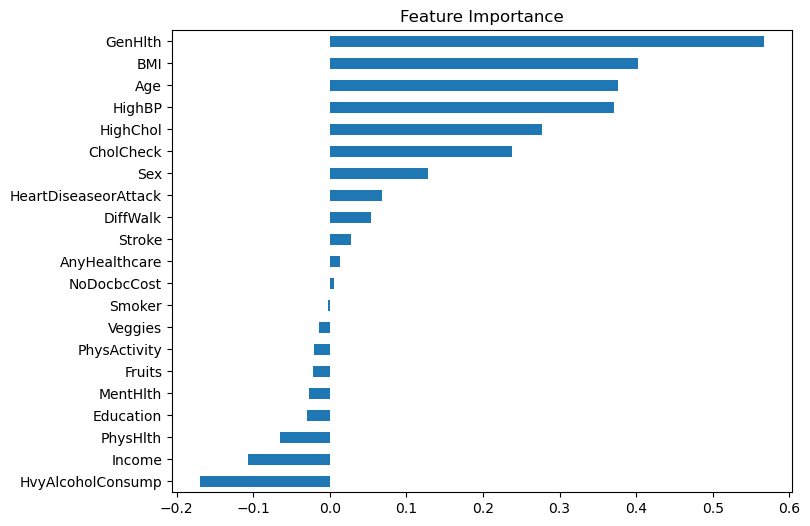

In [48]:
# LogisticRegression coefficients should not depend on the scale of feature values.
# Let's normalize the data. Does that affct the performance and which features where best?
X_train = rfresult["X_train"]
y_train = rfresult["y_train"]
X_test = rfresult["X_test"]
y_test = rfresult["y_test"]

ss = StandardScaler().fit(X_train)
X_train_normalized = ss.transform(X_train)
X_test_normalized = ss.transform(X_test)

rf = LogisticRegression()
rf.fit(X_train_normalized, y_train)

print(f"[TRAIN] AUROC {roc_auc_score(y_train, rf.predict_proba(X_train_normalized)[:,1])}")
# 0.81
print(f"[TEST] AUROC {roc_auc_score(y_test, rf.predict_proba(X_test_normalized)[:,1])}")


importances = rf.coef_[0,:]

feat_imp = pd.Series(importances, 
                     index=X_train.columns
                    ).sort_values()

feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

(202944, 25) (50736, 25)
[TRAIN] AUROC 0.8214255732675898
[TEST] AUROC 0.8265349996343474


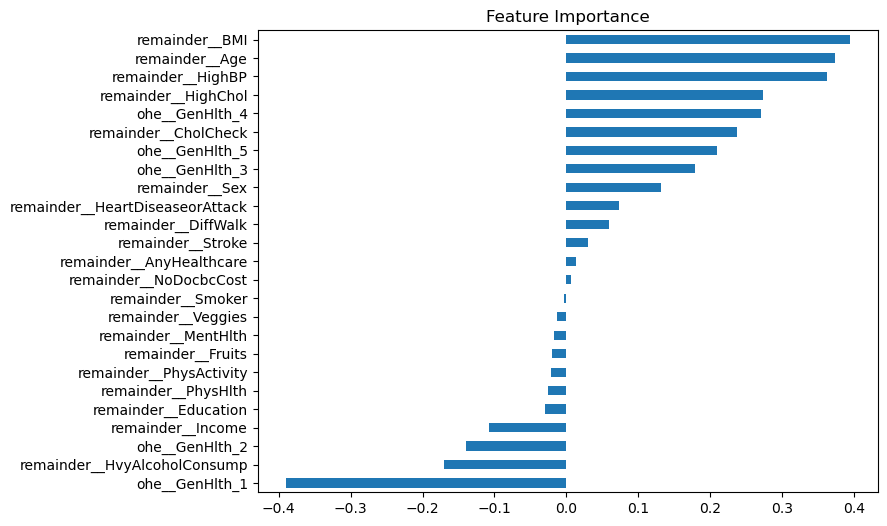

In [49]:
# GenHlth feature has values is a scale (1..5). Is it better to treat that as features:
# GenHlth=1
# GenHlth=2
# GenHlth=3
# GenHlth=4
# GenHlth=5


X_train = rfresult["X_train"]
y_train = rfresult["y_train"]
X_test = rfresult["X_test"]
y_test = rfresult["y_test"]

# In the above. GenHlth was treated as a numeric feature, but it was the most important. Perhaps we should examine 
# it as a categorical feature for better performance

ohe = ColumnTransformer(
            transformers=[("ohe", OneHotEncoder(handle_unknown='ignore'), categorical+['GenHlth'])],
            remainder='passthrough',
        ).fit(X_train)
X_train_normalized = ohe.transform(X_train)
X_test_normalized = ohe.transform(X_test)

ss = StandardScaler().fit(X_train_normalized)
X_train_normalized = ss.transform(X_train_normalized)
X_test_normalized = ss.transform(X_test_normalized)


rf = LogisticRegression()
rf.fit(X_train_normalized, y_train)
print(X_train_normalized.shape, X_test_normalized.shape)
print(f"[TRAIN] AUROC {roc_auc_score(y_train, rf.predict_proba(X_train_normalized)[:,1])}")
# 0.826 -- doesn't help
print(f"[TEST] AUROC {roc_auc_score(y_test, rf.predict_proba(X_test_normalized)[:,1])}")

    
importances = rf.coef_[0,:]
    
feat_imp = pd.Series(importances, 
                     index=ohe.get_feature_names_out()
                    ).sort_values()

feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

In [50]:
# Step wise addition of variables
# -------- Simple logistic Regression with the diabetes data
target = "Diabetes_binary"
top_features = ['Age', 'BMI', 'DiffWalk', 'GenHlth', 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'PhysHlth', 'Stroke']

train_df, test_df = train_test_split(feature_target, train_size=125, random_state=0)

best_feature = None
best_auc = -1

for feature in top_features:
    # X and y for training
    X_train = train_df[[feature]]
    y_train = train_df[target]

    # X and y for test
    X_test = test_df[[feature]]
    y_test = test_df[target]

    # Fit model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict prob of class 1
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute AUC
    auc = roc_auc_score(y_test, y_prob)
    print(feature, auc)

    # Track best feature
    if auc > best_auc:
        best_auc = auc
        best_feature = feature

print("Best feature:", best_feature, "AUC:", best_auc)

Age 0.647461896295525
BMI 0.6883287370244252
DiffWalk 0.6179469519640985
GenHlth 0.7303532906190584
HeartDiseaseorAttack 0.5747705903641648
HighBP 0.6880709335666155
HighChol 0.6429463509451276
PhysHlth 0.6130231860737609
Stroke 0.5301448446678763
Best feature: GenHlth AUC: 0.7303532906190584


In [51]:
# Looking at Forward Stepwise selection to check whether the AUC score improves.  The score improves from 0.7304
# to 0.8037 until it starts to drop again after the addition of a 9th feature. 
# To generate a list of "Top Features", the heatmap of features, including "Diabetes_binary" was used to select 
# those features with a correlation value greater than 0.10.  This yielded a list of 9 possibilities. 

selected = []
remaining = set(top_features)

print("Stepwise selection...\n")

while remaining:

    best_auc = -1
    best_feature = None

    # Try adding each remaining feature to the selected features
    for feature in remaining:
        trial_features = selected + [feature]

        # Train/test matrices
        X_train = train_df[trial_features]
        y_train = train_df[target]

        X_test = test_df[trial_features]
        y_test = test_df[target]

        # Fit model
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)

        # Predict probability for positive class
        y_prob = model.predict_proba(X_test)[:, 1]

        # Compute AUC
        auc = roc_auc_score(y_test, y_prob)

        print(f"Trying: {trial_features}  --> AUC = {auc:.4f}")

        # Keep track of the best feature to add
        if auc > best_auc:
            best_auc = auc
            best_feature = feature

    # Add the best feature found in this iteration
    selected.append(best_feature)
    remaining.remove(best_feature)

    print(f"\nAdded feature: {best_feature}  (AUC = {best_auc:.4f})")
    print(f"Current selected set: {selected}\n")

print("FINAL SELECTED FEATURES:")
print(selected)

Stepwise selection...

Trying: ['DiffWalk']  --> AUC = 0.6179
Trying: ['Age']  --> AUC = 0.6475
Trying: ['BMI']  --> AUC = 0.6883
Trying: ['Stroke']  --> AUC = 0.5301
Trying: ['HighChol']  --> AUC = 0.6429
Trying: ['HeartDiseaseorAttack']  --> AUC = 0.5748
Trying: ['GenHlth']  --> AUC = 0.7304
Trying: ['PhysHlth']  --> AUC = 0.6130
Trying: ['HighBP']  --> AUC = 0.6881

Added feature: GenHlth  (AUC = 0.7304)
Current selected set: ['GenHlth']

Trying: ['GenHlth', 'DiffWalk']  --> AUC = 0.7404
Trying: ['GenHlth', 'Age']  --> AUC = 0.7605
Trying: ['GenHlth', 'BMI']  --> AUC = 0.7661
Trying: ['GenHlth', 'Stroke']  --> AUC = 0.7272
Trying: ['GenHlth', 'HighChol']  --> AUC = 0.7546
Trying: ['GenHlth', 'HeartDiseaseorAttack']  --> AUC = 0.7395
Trying: ['GenHlth', 'PhysHlth']  --> AUC = 0.7287
Trying: ['GenHlth', 'HighBP']  --> AUC = 0.7618

Added feature: BMI  (AUC = 0.7661)
Current selected set: ['GenHlth', 'BMI']

Trying: ['GenHlth', 'BMI', 'DiffWalk']  --> AUC = 0.7660
Trying: ['GenHlth', '

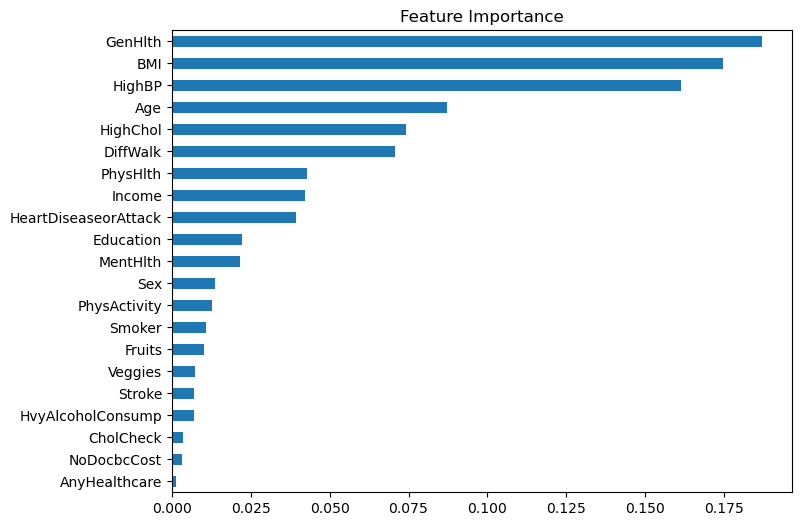

[TRAIN] AUROC 0.8622625902206511
[TEST] AUROC 0.8320988935030482


In [54]:
rfresult = results["RandomForestClassifier"]
# Can't use the above classifier because it is buried in the pipeline object

rf = rfresult["clsfr"]
X_train = rfresult["X_train"]
y_train = rfresult["y_train"]
X_test = rfresult["X_test"]
y_test = rfresult["y_test"]

rf = RandomForestClassifier(
        n_estimators=1000,  # more stable than 100
        criterion="gini",
        max_depth=None,  # let trees grow; RF handles variance well
        min_samples_split=50,
        min_samples_leaf=20,
        max_features="sqrt",  # standard and usually best
        bootstrap=True,
        class_weight=None,  # or "balanced" for imbalance
        n_jobs=-1,
        random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
    
feat_imp = pd.Series(importances, 
                     index=X_train.columns
                    ).sort_values()

feat_imp.plot(kind="barh", figsize=(8,6))
plt.title("Feature Importance")
plt.show()

print(f"[TRAIN] AUROC {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")

print(f"[TEST] AUROC {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

# estimators 400, min sample split 50, min samples leaf 20
#[TRAIN] AUROC 0.8622554310470968
#[TEST] AUROC 0.8320718547114203

# estimators 400, min sample split 100, min samples leaf 40
# [TRAIN] AUROC 0.8465355179747578
# [TEST] AUROC 0.8319322201831507

**CONCLUSION AND DISCUSSION:**

Overall, it was found that Logistic Regression performed well without overfitting. The most important features, such as the General Heatlh score (GenHlth), BMI, and Age were good indicators of the possibility of Diabetes. It should be noted that these important features DO NOT imply causality. Rather, they are likely to be present as an indicator of one's health overall. 

Initially, it appeared the Random Tree Classifiers yielded the best results, followed by the Logistic Regression and the Decision Tree Classifier. However, it was found that the Random Tree Classifier was overfit.  It was foud that logistic regression using the most important features provided the best overall performance without overfitting. The Support Vector Machine model proved to be too slow and did not provide great results. With the SVM, the Accuracy was 0.854, and the AUROC was 0.6144 (see also comments in cell) 

*Initial AUROC Scores on various Classifiers:* 

| Classifier               | Accuracy   | AUROC (test) |  AUROC (train)|
|--------------------------|------------|--------------|---------------|
| Decision Tree            | 0.85793    | 0.77267      |   0.87100     |
| Logistic Regression      | 0.86585    | 0.82635      |   0.82119     |
| Random Forest (300 trees)| 0.86782    | 0.82902      |   0.92701     |
| Random Forest (400 trees)| 0.86782    | 0.82907      |   0.92712     |
| Support Vector Machine   | 0.854      |              |   0.6144      |

Some further analysis into the feature importance of the logistic regression was performed, and it was found that depending on the type of classifier used, the most important features will change. 

Logistic regression considers the risk factors independently, whereas the Random Forest considers combinations of features and sub-populations.

Even though initially it would seem the Random Forest Classifier perofrmed the best, it is overfitting (as evidenced by the 0.927 AUROC on the training data. Adjusting the hyperparameters in the Random Forest Classifiers, one can see a slight improvement in thE AUROC values of the test data set (from 0.829 to 0.832).  This was achieved by increasing the number of estimators from an iitial 400 to 1000.  Adjusting the min_samples_split and min_samples_leaf parameters caused a decrease in performance. 

A Forward Stepwise selection of features was performed with the logistic regression to determine if the AUC score improves.  The score improves from 0.7304 to 0.8037 until it starts to drop again after the addition of a 9th feature.  The analysis of Feature Importance yieled a greater improvement in the overall performance. 

The results of this can be seen visually in the cells above, and summarized in the table below. 

*Final AUROC Scores on Random Forest, Logistic Regression Classifiers after adjustment of parameters:*

| Classifier               | AUROC (test) |  AUROC (train)|
|--------------------------|--------------|---------------|
| Random Forest            | 0.83209      |  0.86226      |   
| Logistic Regression      | 0.82653      |  0.82142      |  


